# Learing pipeline

Miguel Xochicale [@mxochicale](https://github.com/mxochicale)  
Feb2022


## 1.1 Introduction
This notebook presents prototypes to pre-process echocardiography datasets with the use of pytorch features. 

## 1.2 Running notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
## 1.3 References
* Gomez A. et al. 2021 https://github.com/vital-ultrasound/lung/blob/main/multiclass_pytorch/datasets/LUSVideoDataset.py 




## 2. Jupyter Notebook

### 2.1 Setting imports and datasets paths

In [1]:
import os
import sys
import argparse
import yaml
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torch.utils.data import DataLoader
from torchvision import transforms, utils

from source.dataloaders.EchocardiographicVideoDataset import EchoClassesDataset
from source.models.ViewClassifiers import SimpleVideoClassifier
from source.helpers.various import concatenating_YAML_via_tags

HOME_PATH = os.path.expanduser(f'~')
CONFIG_FILES_PATH= 'repositories/echocardiography/scripts/config_files/learning_pipeline'
YML_FILE = os.path.join(HOME_PATH, CONFIG_FILES_PATH, 'config_learning_pipeline.yml')

yaml.add_constructor('!join', concatenating_YAML_via_tags)  ## register the tag handler

with open(YML_FILE, 'r') as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

### 2.2 Setting variables and loading datasets using pytorch dataloader

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define some static transforms, i.e. transforms that apply to the entire dataset.
# These transforms are not augmentation.
pretransform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(size=config['pretransform_im_size']),
    transforms.ToTensor(),  # this normalizes in
])

# define some transforms for data augmentation: they have all random parameters that
# will change at each epoch.
if config['use_augmentation']:
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=5), # in degrees
        transforms.RandomEqualize(p=0.5),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.ToTensor(),  # this normalizes in
    ])
else:
    transform=None

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = EchoClassesDataset(main_data_path=config['main_data_path'],
                             participant_videos_list=config['participant_videos_list'],
                             participant_path_json_list=config['participant_path_json_list'],
                             crop_bounds_for_us_image=config['crop_bounds_for_us_image'],
                             number_of_frames_per_segment_in_a_clip=config['number_of_frames_per_segment_in_a_clip'],
                             sliding_window_length_in_percentage_of_frames_per_segment=config['sliding_window_length_in_percentage_of_frames_per_segment'],
                             device=device,
                             max_background_duration_in_secs=config['max_background_duration_in_secs'],
                             pretransform=pretransform,
                             transform=transform,
                             use_tmp_storage=True,
                             )


### 2.3 Using dataloader with pre-processing image techniques

Plotting 30 clips  and frames: 
10
   Clip number: 0
   Clip number: 1
   Clip number: 2
   Clip number: 3
   Clip number: 4
   Clip number: 5
   Clip number: 6
   Clip number: 7
   Clip number: 8
   Clip number: 9
   Clip number: 10
   Clip number: 11
   Clip number: 12
   Clip number: 13
   Clip number: 14
   Clip number: 15
   Clip number: 16
   Clip number: 17
   Clip number: 18
   Clip number: 19
   Clip number: 20
   Clip number: 21
   Clip number: 22
   Clip number: 23
   Clip number: 24
   Clip number: 25
   Clip number: 26
   Clip number: 27
   Clip number: 28
   Clip number: 29


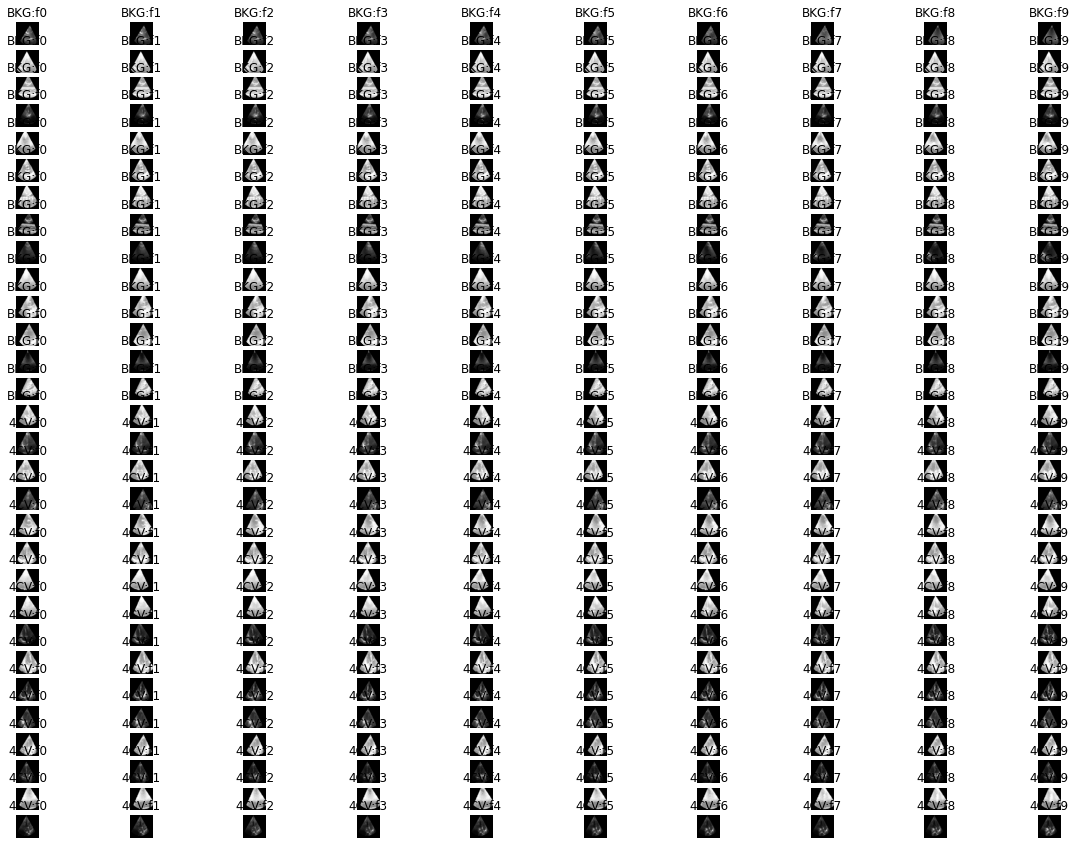

In [3]:
number_of_clips = len(dataset)
print(f'Plotting {number_of_clips} clips  and frames: ')
print(config['number_of_frames_per_segment_in_a_clip'])
labelnames = ('BKG', '4CV') #('B', '4') #


plt.figure(figsize=(20, 15))
subplot_index = 0
for clip_index_i in range(len(dataset)):
    print(f'   Clip number: {clip_index_i}')
    data_idx = dataset[clip_index_i]
#     print(f'   Random index in the segment clip: {data_idx[2]} of n_available_frames {data_idx[3]}')

    for frame_i in range(data_idx[0].shape[1]):
        plt.subplot(number_of_clips, data_idx[0].shape[1], subplot_index+1)
        plt.imshow(data_idx[0][0, frame_i, ...].cpu().data.numpy(), cmap='gray')
        # plt.ylabel('{}'.format( clip_index_i  ) )
        plt.axis('off')
        plt.title('{}:f{}'.format(labelnames[data_idx[1]], frame_i))

        subplot_index +=1

plt.show()



<class 'tuple'>
SimpleVideoClassifier(
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=163840, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=2, bias=True)
    (4): Sigmoid()
  )
)
000 0.74521
001 0.79840
002 0.80533
003 0.81759
004 0.81860
005 0.81782
006 0.73537
007 0.67173
008 0.72727
009 0.76563
010 0.79986
011 0.69032
012 0.64922
013 0.74134
014 0.69292
015 0.69318
016 0.69309
017 0.69320
018 0.69306
019 0.69273
020 0.69292
021 0.69280
022 0.69119
023 0.69243
024 0.70044
025 0.66893
026 0.69317
027 0.68871
028 0.69316
029 0.68905
030 0.69254
031 0.69363
032 0.68265
033 0.69314
034 0.69315
035 0.67869
036 0.69290
037 0.68139
038 0.69292
039 0.66816
040 0.71953
041 0.66838
042 0.74496
043 0.81248
044 0.82368
045 0.80289
046 0.82364
047 0.80284
048 0.83412
049 0.82368
050 0.80285
051 0.81326
052 0.81326
053 0.80284
054 0.80285
055 0.82368
056 0.79243
057 0.79243
058 0.81326
059 0.80286
060 0.8

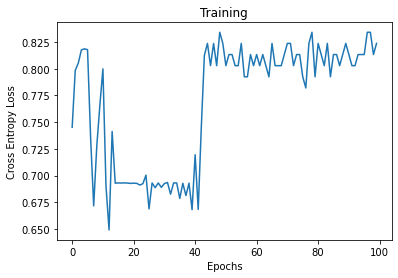

In [4]:
# Dataloader that will serve the batches over the epochs
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=config['batch_size'], shuffle=True)

# Do a loop as if we were training a model
data_size = tuple(data_idx[0].shape)
print(type(data_size))
net = SimpleVideoClassifier(data_size)
net.to(device)
print(net)

optimizer = torch.optim.Adam(net.parameters()) # use default settings
loss_function = nn.CrossEntropyLoss()

losses = []
for epoch in range(config['max_epochs']):
    running_loss = 0
    for step, data in enumerate(dataloader):
        clip = data[0]
        label = data[1].to(device)

        out = net(clip)

        loss = loss_function(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.detach().item()

    running_loss /= len(dataloader)
    losses.append(running_loss)

    print('{:03.0f} {:.5f}'.format(epoch, running_loss))

plt.figure()
plt.plot(losses,'-')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Training')
plt.show()